## This challenge is the capstone project of the Summer Analytics, a primer course on Data Science, conducted by Consulting and Analytics Club of IIT Guwahati in the summers.
The dataset is provided by DeltaX is the pioneering cross-channel digital advertising platform. The cloud-based platform leverages big data, user behavior, and machine learning algorithms to improve performance across the business funnel of advertisers.

## Problem statement:
an advertiser on the platform (DeltaX) would like to estimate the performance of their campaign in the future.
Imagine it is the first day of March and you are given the past performance data of ads between 1st August to 28th Feb. You are now tasked to predict an ad's future performance (revenue) between March 1st and March 15th.

### Model Performed
1. XGBRegressor
2. GradientBoostingRegressor
3. Support vector Regressor
4. RandomForestRegressor
5. Nueral Network for regression

### Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf

### Importing Train data and exploration

In [2]:
data = pd.read_csv("Train_Data.csv")
data.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [3]:
print("shape = ",data.shape, "\n")
data.info()     #There is no nul value

shape =  (4571, 9) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4571 non-null   object 
 1   campaign     4571 non-null   object 
 2   adgroup      4571 non-null   object 
 3   ad           4571 non-null   object 
 4   impressions  4571 non-null   int64  
 5   clicks       4571 non-null   int64  
 6   cost         4571 non-null   float64
 7   conversions  4571 non-null   int64  
 8   revenue      4571 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 321.5+ KB


In [4]:
data.describe()

,impressions,clicks,cost,conversions,revenue
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,92.635747,43.340844,2.800834,1.339094,231.865340
std,198.349737,100.164913,14.361618,5.223922,1091.742763
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000
max,3239.000000,1771.000000,531.250000,94.000000,20515.410000


<AxesSubplot:xlabel='adgroup', ylabel='revenue'>

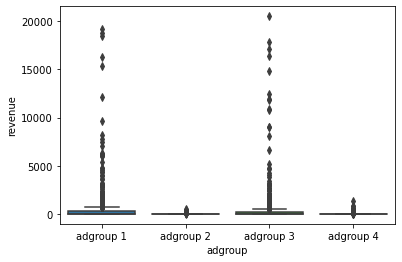

In [5]:
sns.boxplot(x=data['adgroup'],y=data['revenue'])

In [6]:
data.corr()    ## We can see that all the features are important to build model

,impressions,clicks,cost,conversions,revenue
impressions,1.000000,0.987514,0.682811,0.822149,0.759671
clicks,0.987514,1.000000,0.719925,0.856941,0.798282
cost,0.682811,0.719925,1.000000,0.672202,0.581662
conversions,0.822149,0.856941,0.672202,1.000000,0.964096
revenue,0.759671,0.798282,0.581662,0.964096,1.000000


### Importing Test data(The data on which we want to estimate the revenue) and preparing it

In [7]:
test_df = pd.read_csv('Test_Data.csv')

Xtest = test_df.drop(['date','ad'],axis=1)
col = ['campaign','adgroup','impressions','clicks','cost','conversions']
Xtest= Xtest[col]
Xtest.head()

,campaign,adgroup,impressions,clicks,cost,conversions
0,campaign 1,adgroup 1,121,49,0.58,1
1,campaign 1,adgroup 3,22,12,0.17,0
2,campaign 1,adgroup 4,5,3,0.05,0
3,campaign 1,adgroup 2,2,1,0.01,0
4,campaign 1,adgroup 2,3,1,0.01,0


In [8]:
# import sklearn
# sklearn.metrics.SCORERS.keys()

### Encoding and Scaling

In [9]:
X = data.drop(['date','revenue','ad'],axis=1)
y = data.revenue


sc = StandardScaler()
# X = sc.fit_transform(X)
# Xtest2 = sc.transform(Xtest2)
cols =['impressions','clicks','cost','conversions']
X[cols] = sc.fit_transform(X[cols])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
X_train.head(2)

,campaign,adgroup,impressions,clicks,cost,conversions
416,campaign 1,adgroup 2,-0.436831,-0.402788,-0.187383,-0.256367
1725,campaign 1,adgroup 1,-0.411620,-0.382819,-0.135155,-0.256367


In [10]:
Xtest[cols] =sc.transform(Xtest[cols])
Xtest.head(2)

,campaign,adgroup,impressions,clicks,cost,conversions
0,campaign 1,adgroup 1,0.143017,0.056505,-0.154654,-0.064919
1,campaign 1,adgroup 3,-0.356156,-0.312927,-0.183205,-0.256367


### XGBRegreoor model

In [11]:
columns_trans1 = make_column_transformer((OrdinalEncoder(),['campaign','adgroup']),remainder='passthrough')

model = XGBRegressor(objective= 'reg:squarederror',learning_rate=0.2589,n_jobs=9,eval_metric='rmse')  #0.2589 was best for ordinal
pipe2 = make_pipeline(columns_trans1,model)
pipe2.fit(X_train,y_train)

print("MAE = ",mean_absolute_error(y_test,pipe2.predict(X_test)) )
print('r2 = ', r2_score(y_test,pipe2.predict(X_test)))


MAE =  73.00142695288376
r2 =  0.9201504694621716


#### Testing

In [12]:
res = pd.DataFrame(pipe2.predict(Xtest),columns=['revenue'])
res.to_csv('result.csv')
res.head()

,revenue
0,159.806274
1,-2.060985
2,0.127345
3,0.127345
4,0.127345


### GradientBoostingRegressor Model

In [13]:
columns_trans2 = make_column_transformer((OrdinalEncoder(),['campaign','adgroup']),remainder='passthrough')

model =GradientBoostingRegressor(learning_rate=0.18)
pipe3 = make_pipeline(columns_trans2, model)
pipe3.fit(X_train,y_train)

print("MAE = ",mean_absolute_error(y_test,pipe3.predict(X_test)) )
print('r2 = ', r2_score(y_test,pipe3.predict(X_test)))

MAE =  72.70996015482041
r2 =  0.908022958611577


#### Testing

In [14]:
res = pd.DataFrame(pipe3.predict(Xtest),columns=['revenue'])
res.to_csv('result.csv')
res.head()

,revenue
0,150.967654
1,-0.263622
2,-0.263622
3,-0.263622
4,-0.263622


### Support vector Regressor

In [15]:
columns_trans1 = make_column_transformer((OrdinalEncoder(),['campaign','adgroup']),remainder='passthrough')

model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
pipe2 = make_pipeline(columns_trans1,model)
pipe2.fit(X_train,y_train)

print("MAE = ",mean_absolute_error(y_test,pipe2.predict(X_test)) )
print('r2 = ', r2_score(y_test,pipe2.predict(X_test)))


MAE =  109.71951871059541
r2 =  0.2655523658780289


#### Testing

In [16]:
res = pd.DataFrame(pipe2.predict(Xtest),columns=['revenue'])
res.to_csv('result.csv')
res.head()

,revenue
0,114.603942
1,-0.253773
2,-0.019248
3,0.100284
4,0.040165


### RandomForestRegressor model

In [17]:
columns_trans1 = make_column_transformer((OrdinalEncoder(),['campaign','adgroup']),remainder='passthrough')

model =RandomForestRegressor(max_depth=5, random_state=1)
pipe2 = make_pipeline(columns_trans1,model)
pipe2.fit(X_train,y_train)

print("MAE = ",mean_absolute_error(y_test,pipe2.predict(X_test)) )
print('r2 = ', r2_score(y_test,pipe2.predict(X_test)))


MAE =  66.06285416407988
r2 =  0.9165912483634262


In [18]:
res = pd.DataFrame(pipe2.predict(Xtest),columns=['revenue'])
res.to_csv('result.csv')
res.head()

,revenue
0,150.036839
1,0.000000
2,0.000000
3,0.000000
4,0.000000


### Get Dummies to Apply a Nueral Network Method

In [19]:
ode= OrdinalEncoder()
X[['adgroup','campaign']] = ode.fit_transform(X[['adgroup','campaign']])
X.head()

,campaign,adgroup,impressions,clicks,cost,conversions
0,0.0,0.0,-0.346072,-0.372834,-0.189472,-0.256367
1,0.0,1.0,-0.462041,-0.432742,-0.195043,-0.256367
2,0.0,2.0,-0.401535,-0.392804,-0.192258,-0.256367
3,0.0,3.0,-0.441873,-0.392804,-0.189472,-0.256367
4,0.0,0.0,0.778328,0.825321,-0.105211,0.509425


In [20]:
Xtest[['adgroup','campaign']] = ode.fit_transform(Xtest[['adgroup','campaign']])
Xtest.head()

,campaign,adgroup,impressions,clicks,cost,conversions
0,0.0,0.0,0.143017,0.056505,-0.154654,-0.064919
1,0.0,2.0,-0.356156,-0.312927,-0.183205,-0.256367
2,0.0,3.0,-0.441873,-0.402788,-0.191562,-0.256367
3,0.0,1.0,-0.456999,-0.422758,-0.194347,-0.256367
4,0.0,1.0,-0.451957,-0.422758,-0.194347,-0.256367


In [21]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor


### Creat a function to find appropriate parameters

In [22]:
def create_model(layers,activation):
    model = tf.keras.models.Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(tf.keras.layers.Dense(nodes,input_dim=X.shape[1]))
            model.add(tf.keras.layers.Activation(activation))
        else:
            model.add(tf.keras.layers.Dense(nodes))
            model.add(tf.Keras.layers.Activation(activation))
        model.add(tf.keras.layers.Dense(1))
        model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
        return model
modeltemp = KerasRegressor(build_fn= create_model,verbose=0)

In [23]:
layers = [[250,200,150,100],[250,250,200,150],[250,250,200,200]]
activations = ['sigmoid','relu']
param_grid = dict(layers=layers,activation=activations,batch_size=[18,21,24,30,50],epochs=[100])
grid = GridSearchCV(estimator=modeltemp,param_grid=param_grid)

In [24]:
grid_result = grid.fit(X,y)

In [25]:
[grid_result.best_score_, grid_result.best_params_]

[-76.02501525878907,
 {'activation': 'relu',
  'batch_size': 18,
  'epochs': 100,
  'layers': [250, 250, 200, 150]}]

In [28]:
res = pd.DataFrame(grid.predict(Xtest),columns=['revenue'])
res.to_csv('result.csv')
res.head()

,revenue
0,135.275833
1,-0.277630
2,-0.423089
3,-0.259541
4,-0.247575


### Neural network model using thode params

In [29]:
model3 = tf.keras.models.Sequential()
# model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(250,kernel_initializer='normal',input_dim = X.shape[1], activation=tf.nn.relu))

model3.add(tf.keras.layers.Dense(250,kernel_initializer='normal', activation=tf.nn.relu))
model3.add(tf.keras.layers.Dense(200,kernel_initializer='normal', activation=tf.nn.relu))
model3.add(tf.keras.layers.Dense(150,kernel_initializer='normal', activation=tf.nn.relu))
model3.add(tf.keras.layers.Dense(1,kernel_initializer='normal', activation='linear'))
model3.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])


In [30]:
model3.fit(X, y, epochs=100, batch_size=18, validation_split = 0.2)


Epoch 1/100
204/204 [==============================] - 1s 2ms/step - loss: 173.3451 - mean_absolute_error: 173.3451 - val_loss: 54.6956 - val_mean_absolute_error: 54.6956
Epoch 2/100
204/204 [==============================] - 0s 2ms/step - loss: 86.1203 - mean_absolute_error: 86.1203 - val_loss: 75.0666 - val_mean_absolute_error: 75.0666
Epoch 3/100
204/204 [==============================] - 0s 2ms/step - loss: 79.8122 - mean_absolute_error: 79.8122 - val_loss: 46.7248 - val_mean_absolute_error: 46.7248
Epoch 4/100
204/204 [==============================] - 0s 2ms/step - loss: 79.7817 - mean_absolute_error: 79.7817 - val_loss: 41.9531 - val_mean_absolute_error: 41.9531
Epoch 5/100
204/204 [==============================] - 0s 2ms/step - loss: 76.6489 - mean_absolute_error: 76.6489 - val_loss: 52.6236 - val_mean_absolute_error: 52.6236
Epoch 6/100
204/204 [==============================] - 0s 2ms/step - loss: 75.2848 - mean_absolute_error: 75.2848 - val_loss: 42.0472 - val_mean_absolute

204/204 [==============================] - 0s 2ms/step - loss: 65.9108 - mean_absolute_error: 65.9108 - val_loss: 49.7122 - val_mean_absolute_error: 49.7122
Epoch 98/100
204/204 [==============================] - 1s 3ms/step - loss: 64.8540 - mean_absolute_error: 64.8540 - val_loss: 43.8257 - val_mean_absolute_error: 43.8257
Epoch 99/100
204/204 [==============================] - 1s 3ms/step - loss: 64.5680 - mean_absolute_error: 64.5680 - val_loss: 61.7078 - val_mean_absolute_error: 61.7078
Epoch 100/100
204/204 [==============================] - 0s 2ms/step - loss: 69.3012 - mean_absolute_error: 69.3012 - val_loss: 46.1963 - val_mean_absolute_error: 46.1963


In [32]:
res = pd.DataFrame(model3.predict(Xtest),columns=['revenue'])
res.to_csv('result.csv')
res.head(7)

,revenue
0,168.692856
1,-0.000924
2,-0.001834
3,-0.002275
4,-0.002275
5,-0.001853
6,123.247093


## Conclusions:
1. XGBRegressor and RandomForestRegressor model predicted most accuratly
2. Archived RMSE value of ~122 for private leaderboard and 130.86 for public leaderboard